Step 1 탐색적 분석 : 중고나라 데이터 분석하기

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
phone = pd.read_csv('../data/used_mobile_phone.csv')
print(phone.shape)
print(phone.info())
phone.head()

(4951, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB
None


,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


- create_date : 판매(or 구매) 게시글이 올라온 시점
- price : 작성자가 제안한 휴대폰 거래 가격
- text : 게시글의 제목과 본문 합친 텍스트 데이터
- phone_model : 휴대폰 기종
- factory_price : 휴대폰 공시가격
- maker : 휴대폰 제조사
- price_index : 판매 게시글이 올라온 시점에서의 휴대폰 물가 지수 데이터
- (new) month : 월별 거래 횟수

In [3]:
phone.describe()

,price,factory_price,price_index
count,4.951000e+03,4.951000e+03,4951.000000
mean,3.266164e+05,8.358315e+05,100.915336
std,2.169753e+05,1.991910e+05,3.245415
min,1.500000e+04,1.540000e+05,94.900000
25%,1.400000e+05,7.898000e+05,95.960000
50%,3.000000e+05,9.042000e+05,103.050000
75%,4.500000e+05,9.240000e+05,103.050000
max,1.500000e+06,1.283700e+06,103.050000


In [4]:
# 월별 거래 횟수
phone['month'] = phone['create_date'].apply(lambda x: x[:7])
phone['month'].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

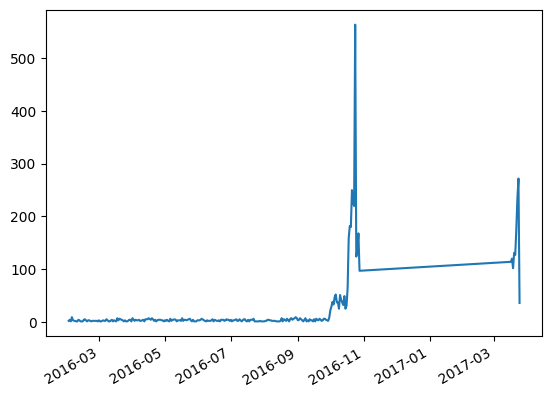

In [5]:
# 일별 거래 횟수 plot
byday = pd.to_datetime(phone['create_date'].apply(lambda x: x[:10])).value_counts()

byday.plot()
plt.show()

<Axes: >

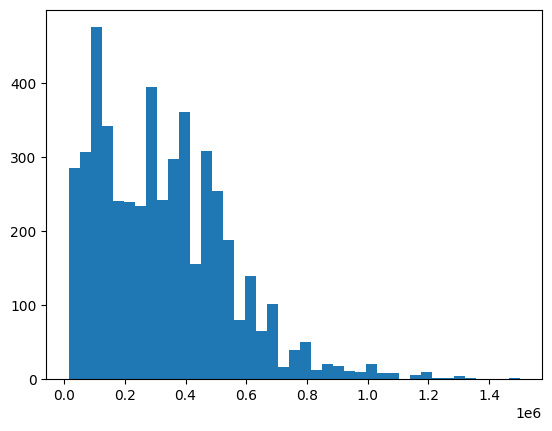

In [6]:
# 가격 분포
phone['price'].hist(bins='auto', grid=False)

<Axes: >

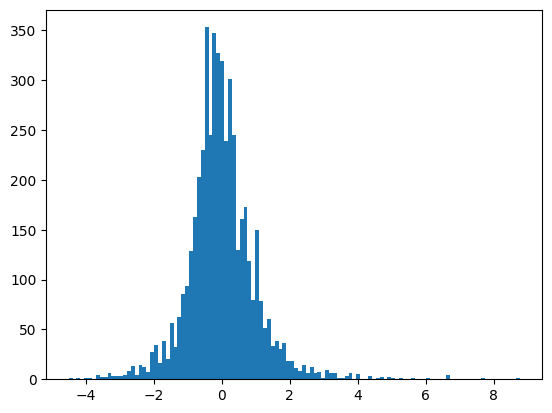

In [7]:
# 동일 기종 내에서의 상대적 가격 : z-score = (x - np.mean(x))/np.std(x)
# group_keys=False : 인덱스와 group화 하려는 열의 중복 방지
price_by_model = phone.groupby('phone_model', group_keys=False)['price'].apply(lambda x: (x - np.mean(x))/np.std(x))
price_by_model.hist(bins='auto', grid=False)

<Axes: xlabel='factory_price', ylabel='price'>

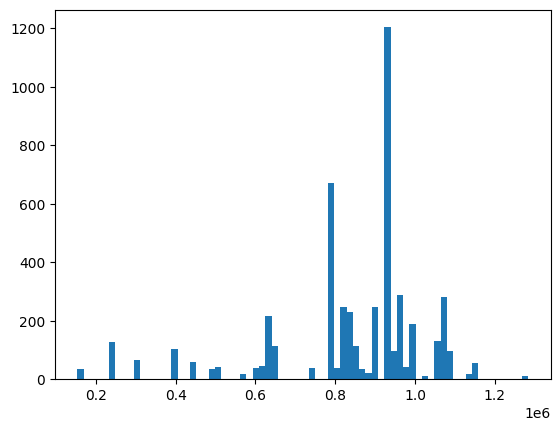

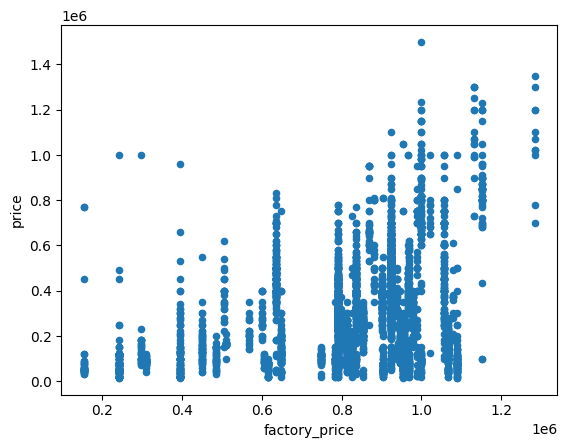

In [8]:
phone['factory_price'].hist(bins='auto', grid=False)

# factory_price와 price간의 관계 : 양의 상관 관계!
phone.plot.scatter(x='factory_price', y='price')

count      64.000000
mean       77.359375
std       143.432786
min        10.000000
25%        23.000000
50%        35.000000
75%        90.500000
max      1002.000000
Name: phone_model, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x24726db1a50>,
 'caps': [<matplotlib.lines.Line2D at 0x24726db1f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x24726db17b0>],
 'medians': [<matplotlib.lines.Line2D at 0x24726db24d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24726db2770>],
 'means': []}

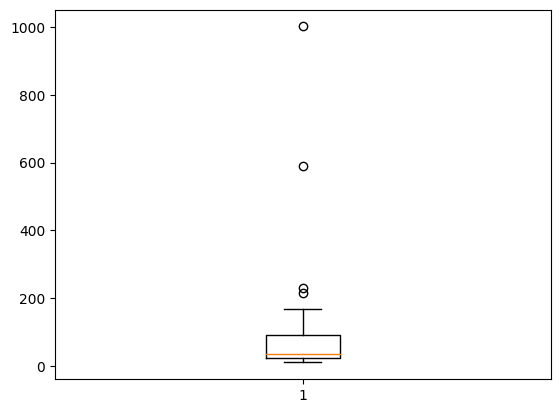

In [9]:
# 휴대폰 기종의 개수
phone_model = phone['phone_model'].value_counts()
print(phone_model.describe())

plt.boxplot(phone_model)

In [10]:
phone_maker = phone['maker'].value_counts()
phone_maker

apple      2450
samsung    1642
lg          677
pantech      57
sony         37
huawei       35
tg           28
sky          25
Name: maker, dtype: int64

In [11]:
phone_price_index = phone['price_index'].value_counts()
phone_price_index

103.05    3061
95.96     1311
102.59     448
94.90      131
Name: price_index, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

X = phone[['price', 'phone_model', 'factory_price', 'maker', 'price_index', 'month']]
# 카테고리화 된 데이터에 one-hot vec 적용
X = pd.get_dummies(X, columns=['phone_model', 'maker', 'month'])
# X = phone.loc[: phone.columns != 'price']

# 정답 지정 및 삭제
y = phone['price']
del X['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 모델 학습
model = RandomForestRegressor(n_estimators=1000, criterion='squared_error')  # n_estimators: The number of trees in the forest
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 모델 평가
print('MSE train : %.3f, test : %.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train : %.3f, test : %.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train : 10619956060.823, test : 13869975017.080
R^2 train : 0.781, test : 0.683


- 피처 중요도 분석하기

[ 0 66 19 52  1 20 83 70 23 77 15 30 39 42 81 76 38 31 82 17 18 78 54 14
 35 80 29 47 43 45 79 22 75 25 40  5 26 28  6  8 68 41 24 50 48 72 74 16
 53 46 62 65 44 58 67  3 51 55 49 59 27 69 61 36  4  2 63 33 32 71 64 34
 10 12 57 56 73 11 60  9 37  7 21 13]
[('factory_price', 0.404948541149233), ('maker_apple', 0.2974768844776174), ('phone_model_galaxy s3 3g 8gb', 0.022253849142564897), ('phone_model_iphone se 64gb', 0.021576137844712462), ('price_index', 0.020729956749893464), ('phone_model_galaxy s4 32gb', 0.01704118970909952), ('month_2017-03', 0.015084731839060029), ('maker_samsung', 0.015082056172314205), ('phone_model_galaxy s6 32gb', 0.012502426935970177), ('month_2016-05', 0.01101713560080591)]


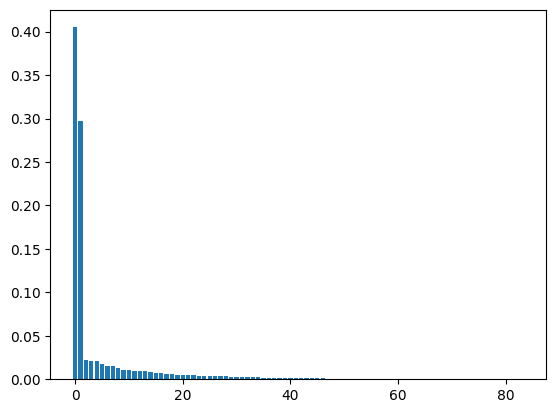

In [13]:
# 학습한 모델의 피처 중요도 그래프
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # np.argsort : array 정렬한 인덱스! , [::-1] 큰 것 부터!
plt.bar(range(X.shape[1]), importances[indices])  # range(X.shape[1]) : 열 개수
print(indices)

# 학습한 모델의 피처 중요도 출력
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, importances))
feature_importance_sort = sorted(feature, key=lambda x: (-x[1])) # -x[1] : reverse=True
print(feature_importance_sort[:10])

In [14]:
# 시간이 피처 중요도에 미치는 영향
for sorted_feature in feature_importance_sort:
    if 'month' in sorted_feature[0]:
        print(sorted_feature)

('month_2017-03', 0.015084731839060029)
('month_2016-05', 0.01101713560080591)
('month_2016-09', 0.008547845920050295)
('month_2016-04', 0.007546174975002934)
('month_2016-10', 0.006498264460130205)
('month_2016-06', 0.004477302427470473)
('month_2016-08', 0.003614584998571903)
('month_2016-07', 0.002715828675672742)
('month_2016-03', 0.002330633710512859)
('month_2016-02', 0.0011131342478313128)


Step 2 피처 엔지니어링 : 예측 모델 개선하기

- 기존 피처 가공 : 'create_date'를 unixtime으로 변경
- unixtime이란 시간을 정수로 표현한 값으로써, 값이 클수록 '최근'임!
- min-max 스케일링 적용하여 0과 1 사이 값으로 상대값 지정
- 점수가 1에 가까울수록 최근, 0에 가까울수록 오래된 게시물!

In [37]:
df = pd.read_csv('../data/used_mobile_phone.csv')

from datetime import datetime
import time

# unixtime으로 변환하는 함수
def date_to_unixtime(date_str):
    timestamp = time.mktime(datetime.strptime(date_str, '%Y-%m-%d').timetuple())
    return timestamp

# 새로운 열로 저장
df['create_unixtime'] = df['create_date'].apply(lambda x: date_to_unixtime(x[:10]))

# min-max scaling
df['create_time_score'] = (df['create_unixtime']-df['create_unixtime'].min()) / (df['create_unixtime'].max()-df['create_unixtime'].min())

# create_time_score 큰 값부터 정렬 : 최근 데이터 추출
df[['create_date', 'create_unixtime', 'create_time_score']].sort_values(by='create_time_score', ascending=False).head()

,create_date,create_unixtime,create_time_score
2401,2017-03-25 8 40 00 AM,1.490368e+09,1.0
37,2017-03-25 8 31 00 AM,1.490368e+09,1.0
2145,2017-03-25 8 39 00 AM,1.490368e+09,1.0
1970,2017-03-25 9 22 00 AM,1.490368e+09,1.0
3469,2017-03-25 12 06 00 AM,1.490368e+09,1.0


- phone_model에 대한 피처 엔지니어링
- 'phone_model' : '제품명 + 용량'
- 이를 나누어주면 2개의 분리된 피처 생성
- phone_model 피처를 분리하는 것은 어떤 효과가 있는지?

In [38]:
# 저장 용량 피처 추출
df['phone_model_storage'] = df['phone_model'].apply(lambda x: x[-4:])

# 기종 세부명 추출
df['phone_model_detail'] = df['phone_model'].apply(lambda x: x[:-4].rstrip())  # ' ' 지워주기

df[['phone_model_storage', 'phone_model_detail']].head()

,phone_model_storage,phone_model_detail
0,64gb,iphone 6
1,32gb,galaxy s6 edge
2,32gb,galaxy s6
3,32gb,lg g5
4,32gb,lg u


{'whiskers': [<matplotlib.lines.Line2D at 0x24753f969b0>,
 'caps': [<matplotlib.lines.Line2D at 0x24753f97910>,
 'boxes': [<matplotlib.lines.Line2D at 0x24753f96800>,
 'medians': [<matplotlib.lines.Line2D at 0x24754094880>,
 'fliers': [<matplotlib.lines.Line2D at 0x24754094b20>,
 'means': []}

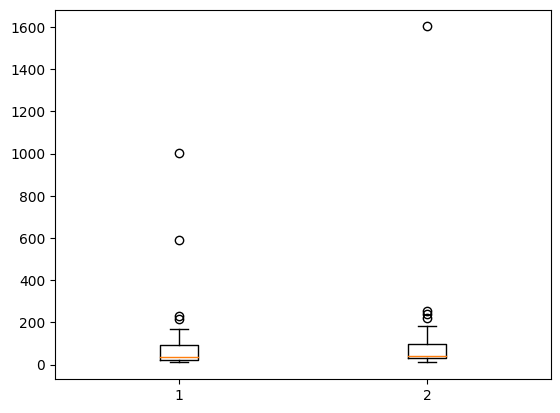

In [39]:
# phone_model 피처의 기종별 거래 데이터 개수
model_counts = df['phone_model'].value_counts()

# phone_model_detail 피처의 기종별 거래 데이터 개수
model_detail_counts = df['phone_model_detail'].value_counts()

data = [model_counts, model_detail_counts]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)

chat-GPT

mpl_fig = plt.figure()

ax = mpl_fig.add_subplot(111)

ax.boxplot(data)

이 코드 해석해줘

ChatGPT
해당 코드는 Matplotlib를 사용하여 상자 그림(Box Plot)을 생성하는 코드입니다.

첫 번째 줄에서는 plt.figure() 함수를 사용하여 새로운 Matplotlib Figure 객체를 생성합니다. Figure 객체는 그래프를 그릴 수 있는 빈 도화지 역할을 합니다. 이 Figure 객체는 mpl_fig라는 변수에 할당됩니다.

두 번째 줄에서는 mpl_fig 객체의 add_subplot() 메서드를 호출하여 그래프의 서브플롯(Subplot)을 생성합니다. add_subplot(111)은 1x1 그리드의 첫 번째 서브플롯을 의미합니다. 생성된 서브플롯은 ax라는 변수에 할당됩니다.

세 번째 줄에서는 ax 객체의 boxplot() 메서드를 호출하여 상자 그림을 그립니다. data는 상자 그림을 그릴 데이터로 가정되며, 해당 데이터를 boxplot() 메서드에 전달하여 상자 그림을 생성합니다.

결과적으로, mpl_fig에는 새로운 Figure 객체가 생성되고, ax에는 상자 그림이 그려진 서브플롯이 할당됩니다.

- 텍스트 정보 피처 엔지니어링
- 물품의 상태를 분류할 수 있는 감성 분류 필요!
- '기종별 가격의 분포는 정규분포다' 이용

① price 피처를 같은 기종 내에서의 z-score로 변환

② z-score 기준, 상위 5%에 속하는 가격의 게시글은 '상태 좋음', 하위 5%는 '상태 나쁨', 그 외 '보통'
    → 상위 n%의 판단은 quantile()함수 사용

③ 정의한 세 가지 상태를 감성 분류의 정답 데이터로 사용

-1.4026599404082731
1.5482394016393304


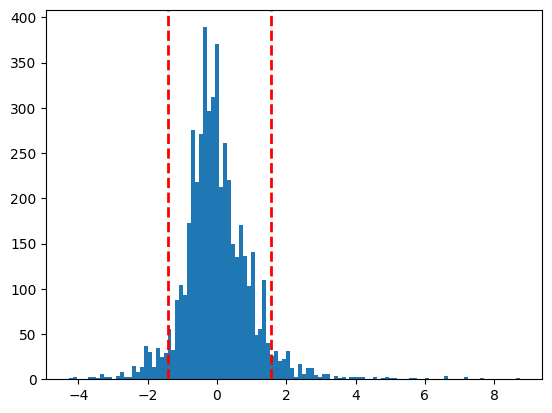

In [40]:
# 거래 가격의 z-score 계산
df['price_by_group'] = df.groupby('phone_model_detail')['price'].apply(lambda x: (x-x.mean())/x.std())

# 거래 가격의 z-score 분포 확인
ax = df['price_by_group'].hist(bins='auto', grid=False)

# z-score 기준 하위 5%, 상위 5%에 해당하는 점수 lower_bound, upper_bound로 저장
lower_bound = df['price_by_group'].quantile(0.05)  # quantile(0.05) : 하위 5% 값
upper_bound = df['price_by_group'].quantile(0.95)

print(lower_bound)
print(upper_bound)

ax.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
ax.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)

In [41]:
# lower보다 낮으면 0, upper보다 높으면 2, 그 중간이면 1 
# 기종 상태 0나쁨, 2좋음, 1보통
def get_price_level(price, lower, upper):
    if price <= lower:
        return '0'
    elif price > upper:
        return '2'
    else:
        return '1'

# apply() : 연산 가능해야만 실행, transform() : 연산 가능한 컬럼만 알아서 필터링
df['price_lower'] = df.groupby('phone_model_detail')['price'].transform(lambda x : x.quantile(0.05))
df['price_upper'] = df.groupby('phone_model_detail')['price'].transform(lambda x : x.quantile(0.95))

df['price_level'] = df.apply(lambda x: get_price_level(x['price'], x['price_lower'], x['price_upper']), axis=1)
df[['price', 'price_lower', 'price_upper', 'price_level', 'text']].head()

,price,price_lower,price_upper,price_level,text
0,550000.0,180000.0,630000.0,1,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...
1,380000.0,180000.0,414000.0,1,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...
2,300000.0,150000.0,349000.0,1,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...
3,290000.0,100000.0,500000.0,1,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...
4,280000.0,18000.0,400000.0,1,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...


- 텍스트 전처리 과정
- 중고나라 텍스트 분석 불용어 파일 활용

In [42]:
import pickle
import re

# pickle : list나 dict 속 객체를 bin(0|1)의 형태로 저장
with open('../data/used_mobile_phone_stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)  # 한 줄씩 읽어서 stopwords에 list형으로 저장
    # stopwords_add = pickle.dump(a, f)  # a=[1, 2, 3] 객체를 저장

# 불용어 사전에 등록된 단어 10개 출력
print(stopwords[:10])

['거래', '입니', '판매', '아이폰', '갤럭시', '골드', '팝', '만원', '폰', '시']


- text_cleaning() : 특수문자 제거('+', ',' 제외), 숫자 제거
- get_pos() : 불용어에 등장하지 않는 형태소만 추출하여 반환

In [43]:
from konlpy.tag import Okt

def text_cleaning(text):
    # 숫자 형태의 문자 isalnum()나 '+', ','를 제외한 특수문자 제거
    text = ''.join(c for c in text if c.isalnum() or c in '+, ')
    text = ''.join([i for i in text if not i.isdigit()])
    return text

def get_pos(x):
    okt = Okt()
    poses = okt.pos(x)  # [('안녕하세요', 'Adjective'), ('.', Punctuation)...]
    return [pos[0] for pos in poses if pos[0] not in stopwords]

df['text'] = df['text'].apply(lambda x: text_cleaning(x))
result = get_pos(df['text'][0])  # 열 정보 가져와서 함수 통과
print(result)

['+', '애플', '라이트', '팝니다', '+', '애플', '라이트', '팝니다', '+', '애플', '라이트', '팝니다', '리퍼', '기간', '만료', '되어서', '징', '하게', '되었습니다', '상태', '초', 'a', '급', '스', '없습니다', '+', '애플', '라이트', '팝니다', '+', '애플', '라이트', '팝니다', '리퍼', '기간', '만료', '되어서', '징', '하게', '되었습니다', '상태', '초', 'a', '급', '스', '없습니다', '징', '애플', '라이트', '홈', '버튼', '링', '카메라', '링', '볼륨', '버튼', '슬립', '버튼', '검금', '심플', '튀지', '않게', '이쁘게', '했구요', '유심', '꽂고', '바로', '사용', '하시면', '됩니다', '사람', '이냐', '자주', '물어보고', '실제', '더욱', '이쁩니다', '밤', '영롱하게', '맥북', '뒷', '사과', '로고', '비춰지고', '요전', '넘어가기', '위해', '합니다', '가능합니다', '박스', '어머니', '버리시고', '이어폰', '충전기', '정품', '드립니다', '직거래', '우선', '순', '위로', '정', '싶으시면', '선', '입금', '택배', '발송', '해드리겠습니다', '믿으시면', '직거래', '하시길', '추천', '해요', '안전', '합니다', '서울시', '강남구', '역삼동', '차병원', '사거리', '근처', '가격']


In [44]:
from collections import Counter

# get_pos() 함수를 모든 텍스트 데이터에 적용한 형태소 말뭉치 추출
corpus = sum(df['text'].apply(lambda x: get_pos(x)).tolist(), [])
corpus

['+',
 '애플',
 '라이트',
 '팝니다',
 '+',
 '애플',
 '라이트',
 '팝니다',
 '+',
 '애플',
 '라이트',
 '팝니다',
 '리퍼',
 '기간',
 '만료',
 '되어서',
 '징',
 '하게',
 '되었습니다',
 '상태',
 '초',
 'a',
 '급',
 '스',
 '없습니다',
 '+',
 '애플',
 '라이트',
 '팝니다',
 '+',
 '애플',
 '라이트',
 '팝니다',
 '리퍼',
 '기간',
 '만료',
 '되어서',
 '징',
 '하게',
 '되었습니다',
 '상태',
 '초',
 'a',
 '급',
 '스',
 '없습니다',
 '징',
 '애플',
 '라이트',
 '홈',
 '버튼',
 '링',
 '카메라',
 '링',
 '볼륨',
 '버튼',
 '슬립',
 '버튼',
 '검금',
 '심플',
 '튀지',
 '않게',
 '이쁘게',
 '했구요',
 '유심',
 '꽂고',
 '바로',
 '사용',
 '하시면',
 '됩니다',
 '사람',
 '이냐',
 '자주',
 '물어보고',
 '실제',
 '더욱',
 '이쁩니다',
 '밤',
 '영롱하게',
 '맥북',
 '뒷',
 '사과',
 '로고',
 '비춰지고',
 '요전',
 '넘어가기',
 '위해',
 '합니다',
 '가능합니다',
 '박스',
 '어머니',
 '버리시고',
 '이어폰',
 '충전기',
 '정품',
 '드립니다',
 '직거래',
 '우선',
 '순',
 '위로',
 '정',
 '싶으시면',
 '선',
 '입금',
 '택배',
 '발송',
 '해드리겠습니다',
 '믿으시면',
 '직거래',
 '하시길',
 '추천',
 '해요',
 '안전',
 '합니다',
 '서울시',
 '강남구',
 '역삼동',
 '차병원',
 '사거리',
 '근처',
 '가격',
 's',
 '팝니다',
 '직거래',
 's',
 '품명',
 's',
 '제품',
 '상태',
 '사진',
 '참고',
 '용량',
 '선택',
 '약정',
 '여부',
 '가능',
 '요금',

chat-GPT

sum(..., [])는 각 텍스트의 결과 리스트들을 모두 합쳐서 하나의 리스트로 만듭니다. 

빈 리스트([])는 초기값으로 사용됩니다.

이렇게 하면 모든 텍스트에 대한 'get_pos' 함수의 결과가 하나의 리스트인 'corpus'에 저장됩니다.

In [45]:
counter = Counter(corpus)
common_words = [key for key, val in counter.most_common(2500)]
common_words[:10]

['입니다', '직거래', 's', '합니다', '택배', '사용', '급', '상태', '팝니다', '가능합니다']

#### TF-IDF 벡터 : https://blog.acronym.co.kr/615
- TF : 해당 단어가 나온 빈도 수
- IDF : log_2(문서 수/빈도 수 (+ 1)) [분모 0 방지]
- TF-IDF : TF * IDF

In [46]:
# 0: 1: 2 = 1: 3: 1 비율
df['price_level'].value_counts()

1    4380
0     343
2     228
Name: price_level, dtype: int64

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 빈출 형태소만 모아 저장하는 함수
def get_common_pos(x):
    okt = Okt()
    poses = okt.pos(x)
    return [pos[0] for pos in poses if pos[0] in common_words]

# 1: 3: 1 비율로 데이터 셋 정의 : DataFrame 형태
negative_random = df[df['price_level']=='0'].sample(228, random_state=30)
neutral_random = df[df['price_level']=='1'].sample(228*3, random_state=30)
positive_random = df[df['price_level']=='2'].sample(228, random_state=30)

In [48]:
# sample = neg[, neu[, pos[]]]
df_sample = negative_random.append(neutral_random).append(positive_random)
df_sample.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime,create_time_score,phone_model_storage,phone_model_detail,price_by_group,price_lower,price_upper,price_level
4729,2017-03-23 11 25 00 AM,730000.0,"아이폰 매트블랙 기가 만원 확정기변,선택약정 가능 년 월 개통후에 한달정도 사용...",iphone 7 256gb,1130800,apple,95.96,1.490195e+09,0.995204,56gb,iphone 7 2,-1.928355,730000.0,1300000.0,0
182,2017-03-23 2 56 00 AM,40000.0,설현의 루나워치 새것 싸게 팝니다 블랙 화이트 다 있습니다 말그대로 새것이며 개통안...,luna 16gb,449900,tg,95.96,1.490195e+09,0.995204,16gb,luna,-0.972679,47000.0,283500.0,0
933,2016-10-23 12 00 00 PM,110000.0,아이폰s기가 판매합니다 상태 완전 좋습니다 언락폰이구요 아는형한테 받아서 애지중...,iphone 6 128gb,1056000,apple,103.05,1.477148e+09,0.633094,28gb,iphone 6 1,-2.343357,253000.0,800000.0,0
12,2016-10-11 9 19 00 PM,15000.0,skt g폰 정리합니다 폴더 슬라이드 x 용 휴대폰 sktg폰 정리합니다 폴더...,wine smart jazz 4gb,242000,lg,103.05,1.476112e+09,0.604317,4gb,wine smart jazz,-0.732123,20000.0,150000.0,0
94,2016-10-02 4 03 00 PM,30000.0,lg gpro 지프로 깨끗함 판매완료 lg gpro 지프로 깨끗함 만 lg upl...,galaxy note4 32gb,396000,samsung,103.05,1.475334e+09,0.582734,32gb,galaxy note4,-1.200605,40000.0,330000.0,0


In [49]:
# 문서 단어 행렬 구하기
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_common_pos(x))
X = index_vectorizer.fit_transform(df_sample['text']).toarray()

print(X)

# TF-IDF를 수행
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X).toarray()

print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.28010945 0.         0.         ... 0.         0.         0.        ]]


In [50]:
# 감성 분류를 위한 학습 데이터셋 정의
y = df_sample['price_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape)
print(X_test.shape)

(912, 2447)
(228, 2447)


In [51]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# 비선형 SVM 분류 모델 학습 및 평가
svm = SVC(kernel='rbf', C=10.0, random_state=0, gamma=0.10)
svm.fit(X_train, y_train)
y_pred_ksvc = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_ksvc))

# confusion matrix 출력
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_ksvc)
print(confmat)

Accuracy: 0.71
[[ 17  19   4]
 [  8 119  16]
 [  2  17  26]]


Step 3 예측 : 중고 휴대폰 거래가 예측하기

In [52]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime,create_time_score,phone_model_storage,phone_model_detail,price_by_group,price_lower,price_upper,price_level
0,2017-03-19 4 35 00 PM,550000.0,아이폰플러스 블랙+애플라이트 기가 팝니다 아이폰플러스 블랙+애플라이트 기가 팝니다...,iphone 6 64gb,924000,apple,95.96,1.489849e+09,0.985612,64gb,iphone 6,1.016515,180000.0,630000.0,1
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s엣지 기가 팝니다 직거래 갤럭시s엣지 기가 품명 갤럭시s엣지제품 단품상태 ...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477408e+09,0.640288,32gb,galaxy s6 edge,1.003699,180000.0,414000.0,1
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s 풀박스로 팝니다 새상품급 실기스조차 없어요 직접거래 구매한지 개월만에 ...,galaxy s6 32gb,854000,samsung,103.05,1.477321e+09,0.637890,32gb,galaxy s6,0.669017,150000.0,349000.0,1
3,2017-03-23 11 14 00 PM,290000.0,sk g 티탄 폰 단품판매합니다 직접거래 sk g 티탄 폰 단품판매합니다 올 월...,lg g5 32gb,836000,lg,95.96,1.490195e+09,0.995204,32gb,lg g5,-0.330426,100000.0,500000.0,1
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c ultra e gb 미사용 새제품 팝니다 소니 엑스페리...,lg u 32gb,396000,lg,102.59,1.460300e+09,0.165468,32gb,lg u,1.014392,18000.0,400000.0,1


In [35]:
# text 피처로부터  '상품 상태 피처(product_status)' 를 생성합니다.
X = index_vectorizer.transform(df['text'].tolist())
X = tfidf_vectorizer.transform(X).toarray()
df['product_status'] = pd.Series(svm.predict(X))

# 랜덤 포레스트 모델 학습을 위한 데이터를 준비합니다.
df = df[['price', 'factory_price', 'maker', 'price_index', 'create_time_score', 'phone_model_storage',
                'phone_model_detail', 'product_status']]
df = pd.get_dummies(df, columns=['maker', 'phone_model_storage', 'phone_model_detail', 'product_status'])

# 학습/테스트 데이터를 분리합니다.
X = df.loc[:, df.columns != 'price']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 랜덤 포레스트 모델을 학습하고 평가합니다.
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='squared_error')
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

# 피처 중요도 plot을 출력합니다.
importances = forest.feature_importances_
plt.plot(importances, "o")

# 피처 중요도를 print로 출력합니다.
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]

KeyError: "['maker', 'phone_model_storage', 'phone_model_detail'] not in index"

In [ ]:
# 테스트 데이터의 y값과 예측된 y값을 산점도 그래프로 상관 관계
plt.scatter(y_test.values, y_test_pred)